In [1]:
import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import gym
from frozen_lake_utils import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
FIG_PATH = 'figures/'

RANDOM_SEED = 17
ENV_NAME = "frozen_lake"

In [3]:
from gym.envs.toy_text.frozen_lake import generate_random_map

np.random.seed(RANDOM_SEED)

large_size = 8
large_map = generate_random_map(size=large_size, p=0.8)

In [4]:
env_small = gym.make('FrozenLake-v0', desc=None)
env_large = gym.make('FrozenLake-v0', desc=large_map)

In [5]:
print("\nsmall grid:\n", env_small.desc.astype(str))
print("\nlarge grid:\n", env_large.desc.astype(str))


small grid:
 [['S' 'F' 'F' 'F']
 ['F' 'H' 'F' 'H']
 ['F' 'F' 'F' 'H']
 ['H' 'F' 'F' 'G']]

large grid:
 [['S' 'F' 'F' 'F' 'F' 'F' 'F' 'F']
 ['F' 'F' 'H' 'F' 'H' 'H' 'F' 'F']
 ['F' 'F' 'F' 'F' 'F' 'F' 'F' 'F']
 ['F' 'F' 'F' 'F' 'F' 'F' 'F' 'H']
 ['F' 'F' 'F' 'F' 'F' 'F' 'F' 'H']
 ['F' 'F' 'H' 'F' 'F' 'F' 'H' 'F']
 ['F' 'H' 'H' 'F' 'F' 'F' 'F' 'F']
 ['F' 'H' 'F' 'F' 'F' 'H' 'F' 'G']]


# Value Iteration

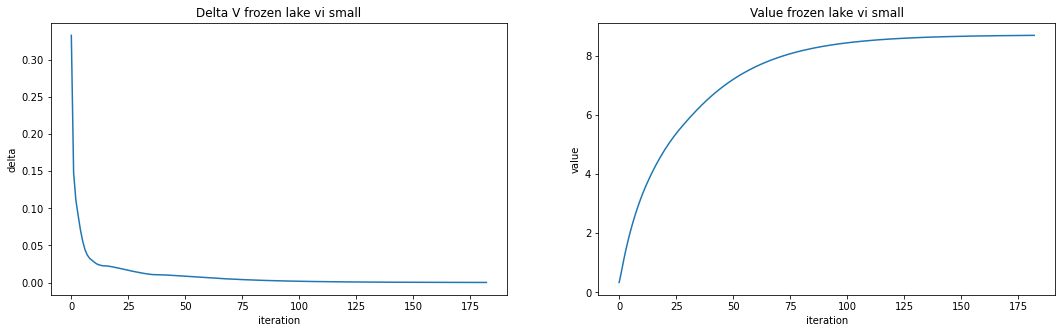

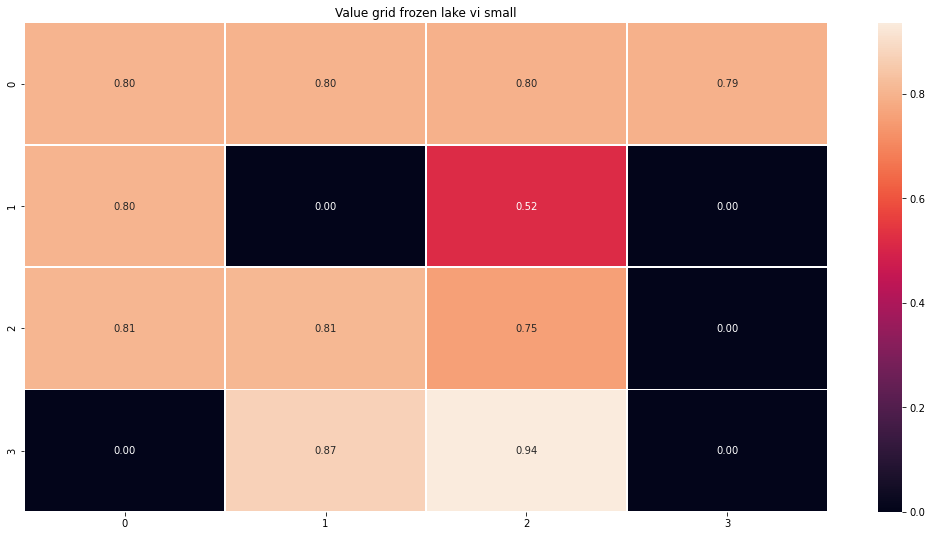

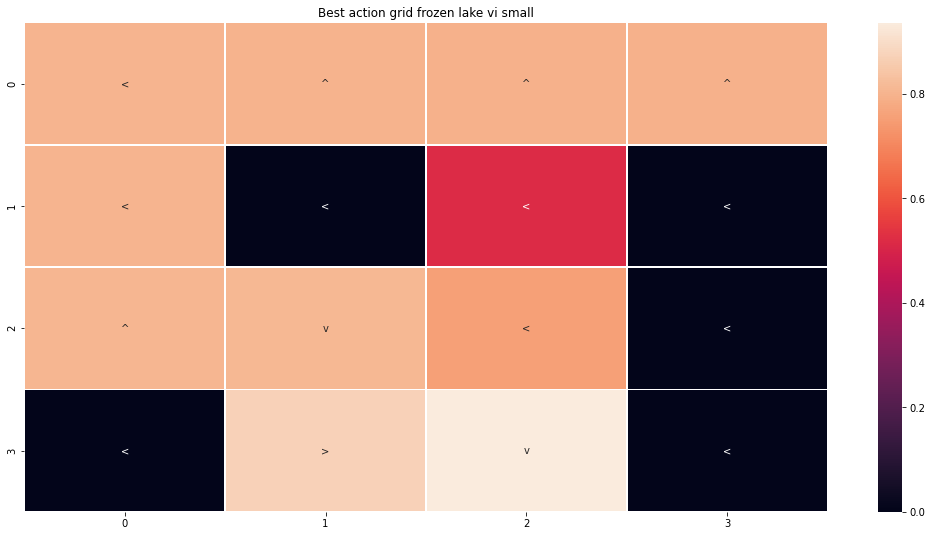

Wall time: 1.08 s


In [6]:
%%time
_, policy_vi_small, stats_vi_small = value_iteration_function(env_small, discount_factor=0.9995, max_iterations=200, name=ENV_NAME+"_vi_small")

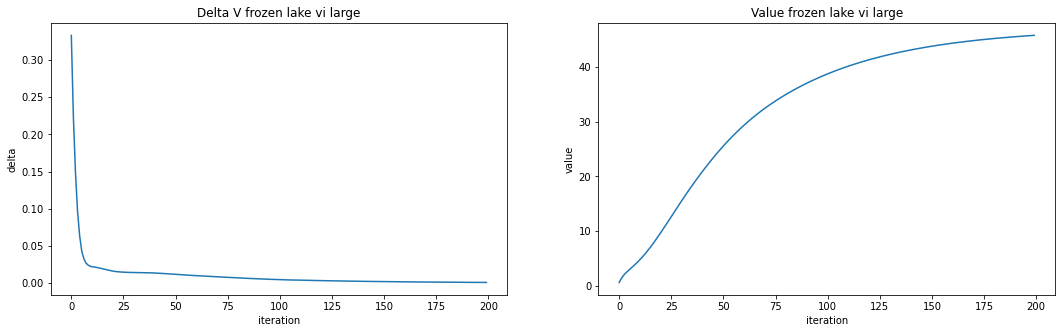

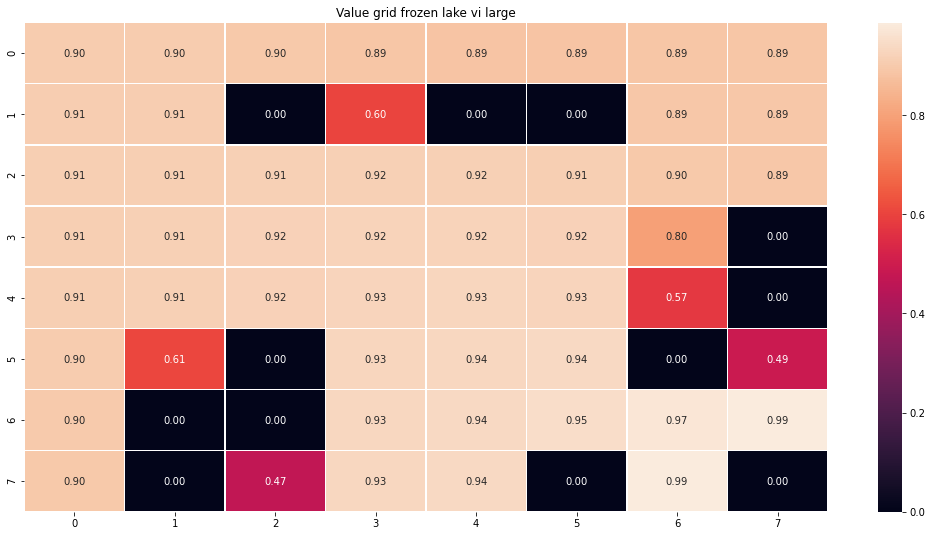

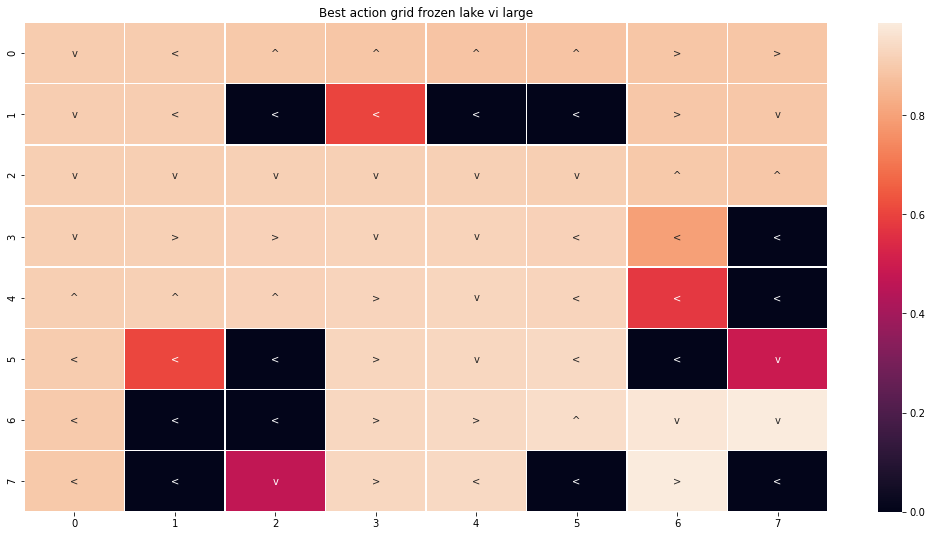

Wall time: 2.67 s


In [7]:
%%time
_, policy_vi_large, stats_vi_large = value_iteration_function(env_large, discount_factor=0.9995, max_iterations=200, name=ENV_NAME+"_vi_large")

# Policy Iteration

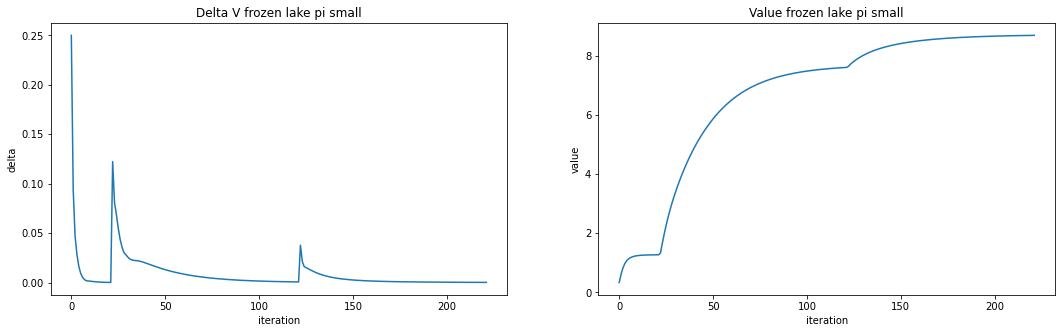

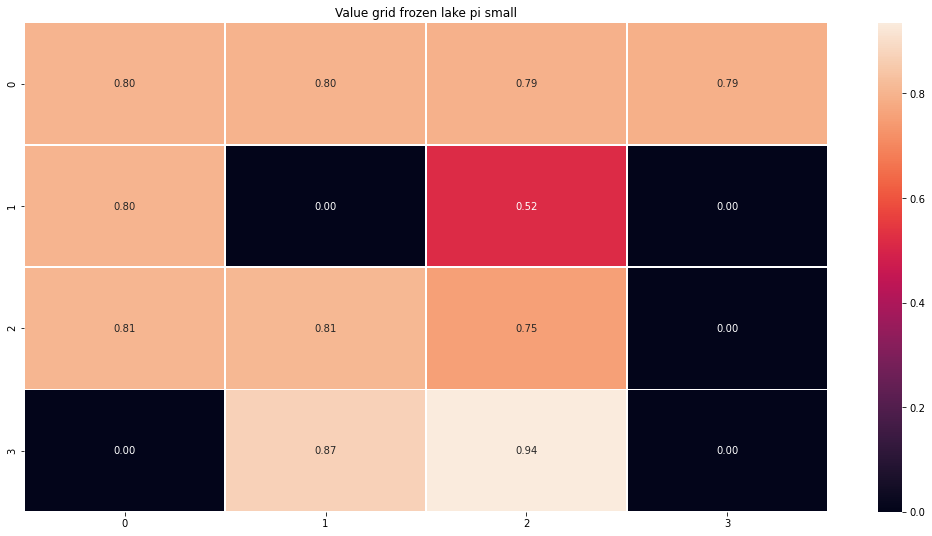

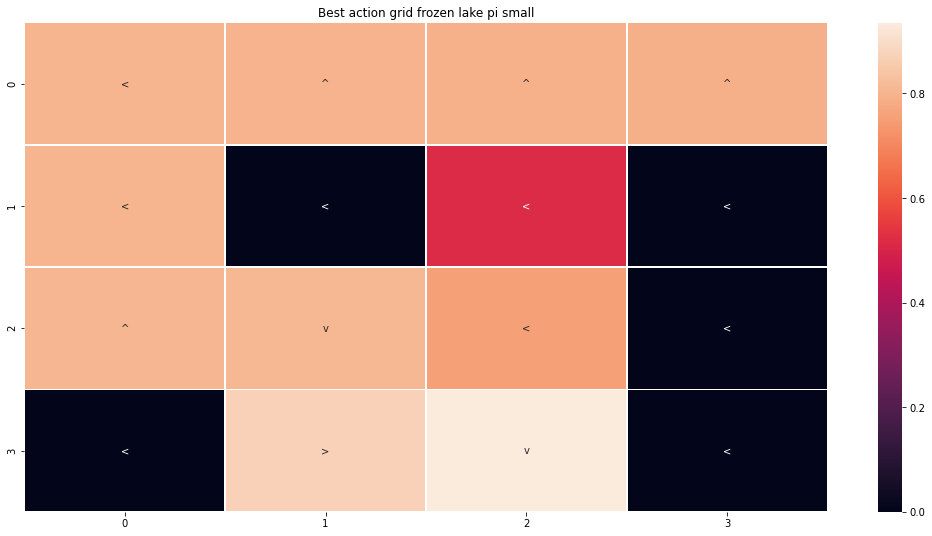

Wall time: 1.39 s


In [8]:
%%time
_, policy_pi_small, stats_pi_small = policy_iteration_function(env_small, discount_factor=0.9995, max_iterations_hl=20, max_iterations_ll=100, 
                                       name=ENV_NAME+"_pi_small")

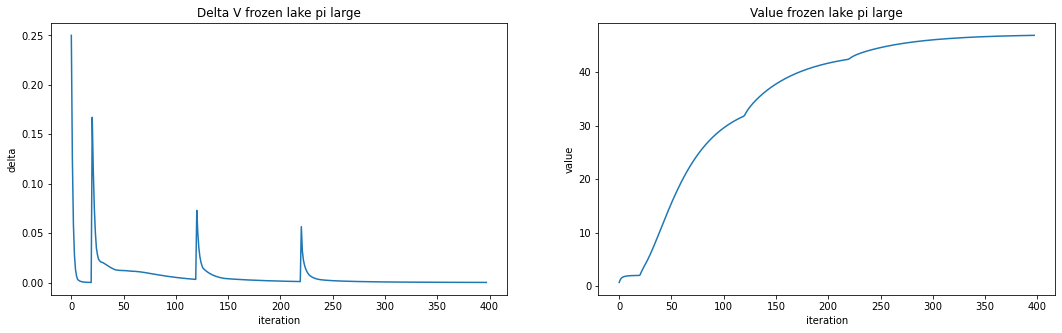

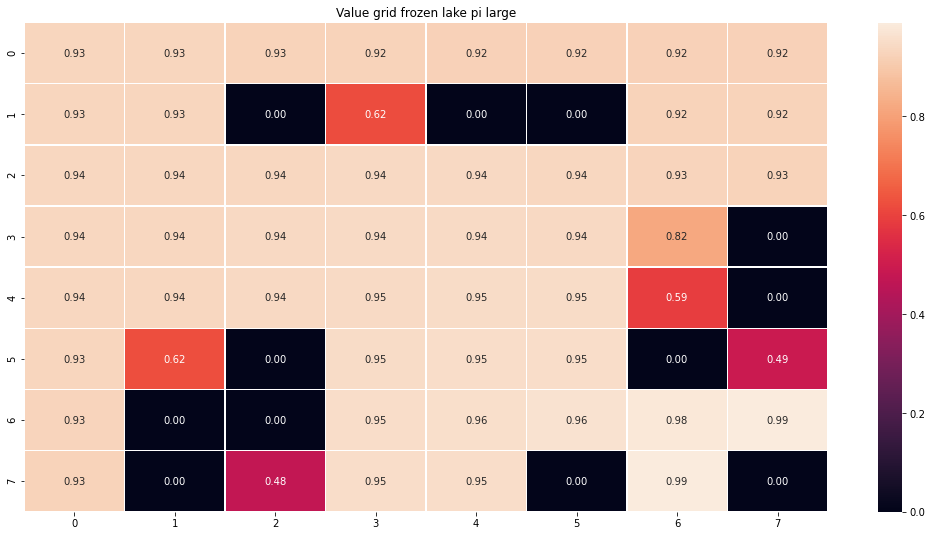

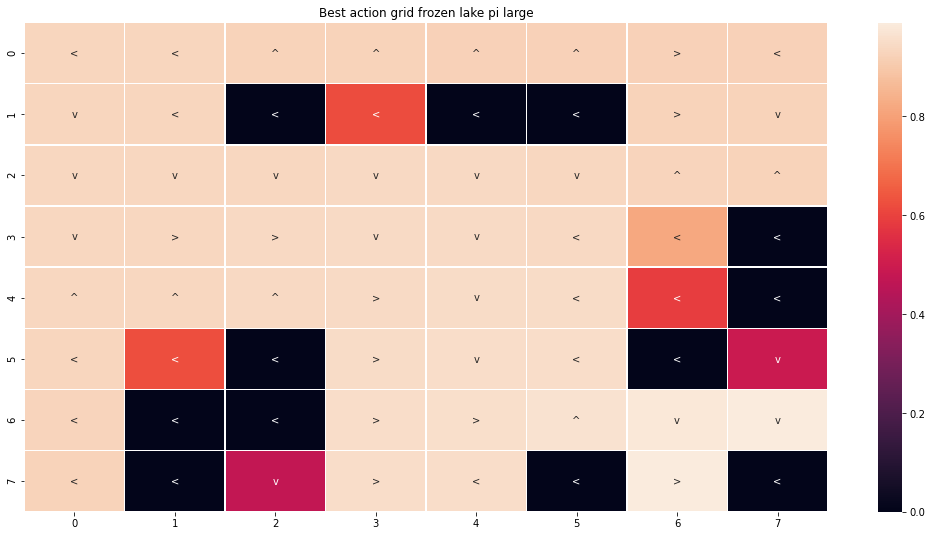

Wall time: 2.78 s


In [9]:
%%time
_, policy_pi_large, stats_pi_large = policy_iteration_function(env_large, discount_factor=0.9995, max_iterations_hl=20, max_iterations_ll=100, 
                                       name=ENV_NAME+"_pi_large")

# Q-Learning


Episode 3000
average score = 0.1100

Episode 6000
average score = 0.3860

Episode 9000
average score = 0.5180

Episode 12000
average score = 0.6940

Episode 15000
average score = 0.7160

---> finished at episode 15000 in 14.13 seconds
max score: 0.734 at episode 14702 after 13.67s


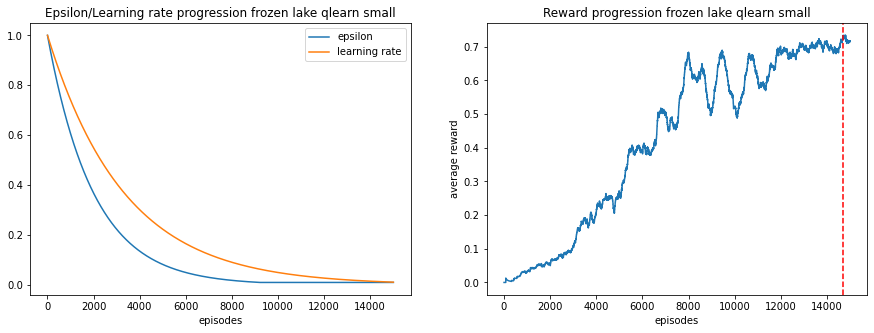

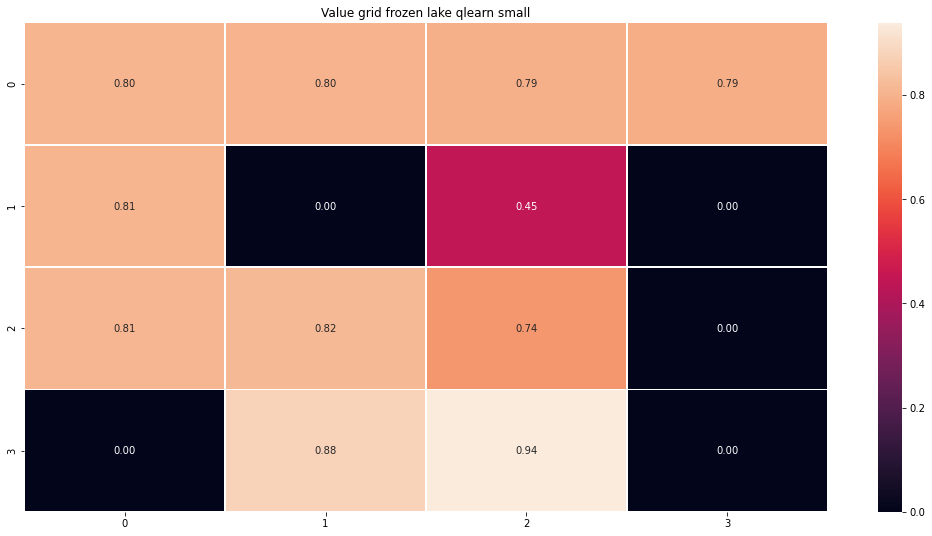

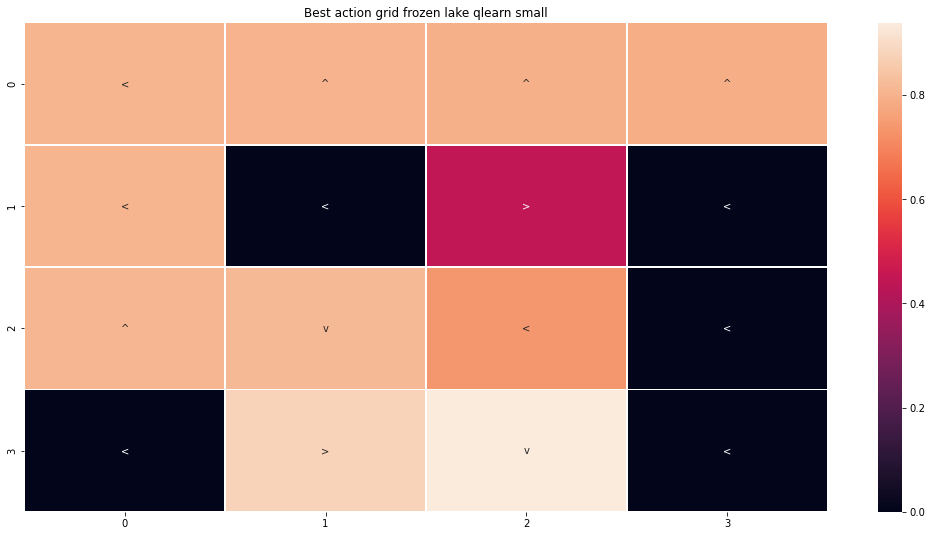

Wall time: 15.2 s


In [10]:
%%time
_, policy_qlearning_small, stats_ql_small = q_learning_function(env_small, num_episodes=15000, discount_factor=0.9995, 
                                                                learning_rate_decay=0.9997, epsilon_decay=0.9995, name=ENV_NAME+"_qlearn_small")


Episode 3000
average score = 0.0000

Episode 6000
average score = 0.0000

Episode 9000
average score = 0.0000

Episode 12000
average score = 0.0000

Episode 15000
average score = 0.0000

---> finished at episode 15000 in 32.73 seconds
max score: 0.0 at episode 1 after 0.0s


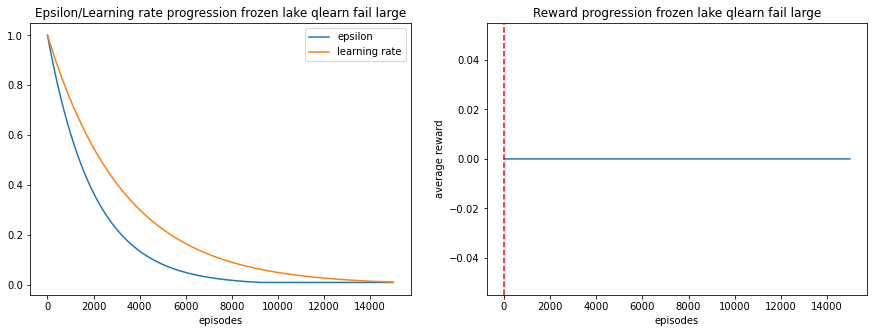

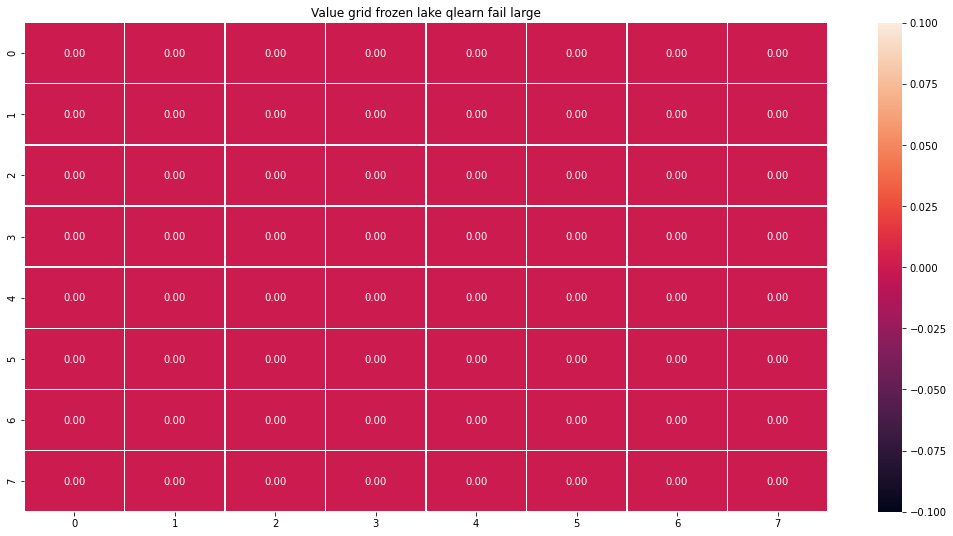

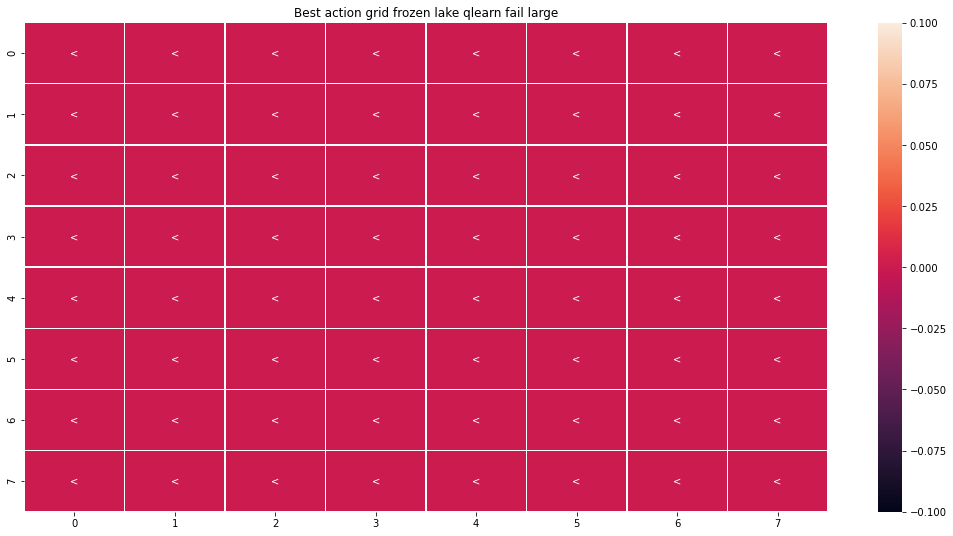

Wall time: 34.5 s


In [11]:
%%time
_, policy_qlearning_large_fail, stats_ql_large_fail = q_learning_function(env_large, num_episodes=15000, discount_factor=0.9995,
                                                                          learning_rate_decay=0.9997, epsilon_decay=0.9995, name=ENV_NAME+"_qlearn_fail_large")


Episode 20000
average score = 0.0220

Episode 40000
average score = 0.2040

Episode 60000
average score = 0.3100

Episode 80000
average score = 0.3560

Episode 100000
average score = 0.4680

---> finished at episode 100000 in 146.88 seconds
max score: 0.492 at episode 97592 after 141.97s


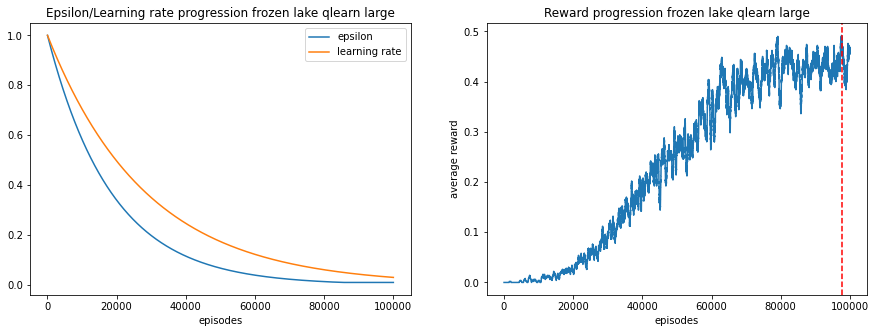

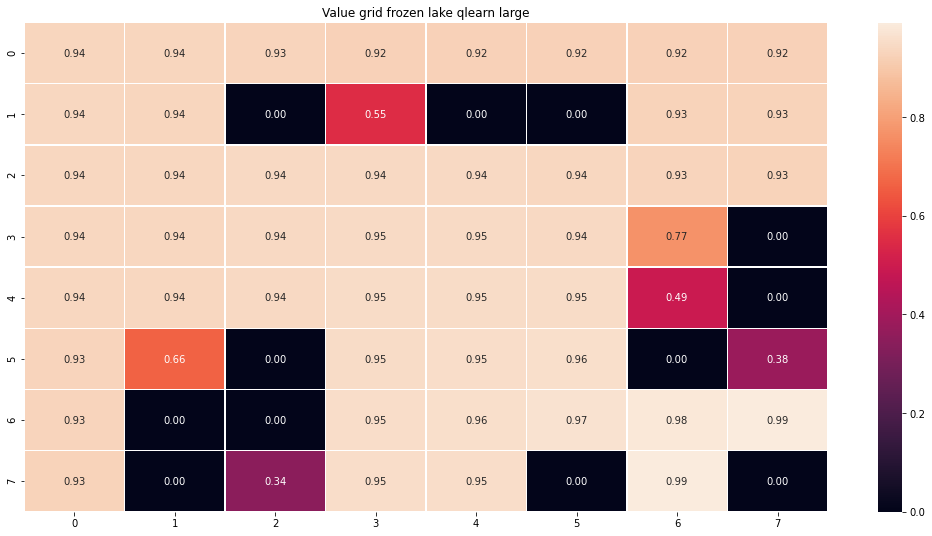

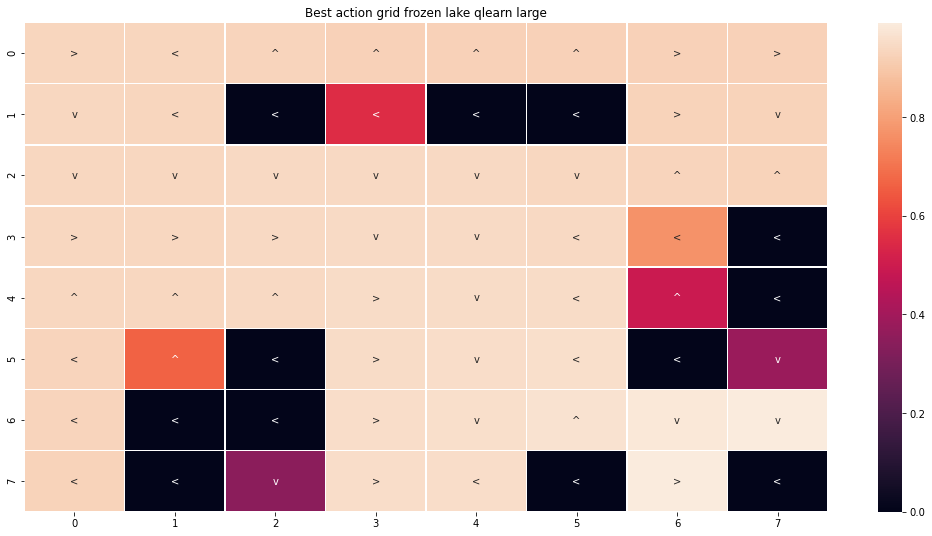

Wall time: 2min 28s


In [25]:
%%time
_, policy_qlearning_large, stats_ql_large  = q_learning_function(env_large, num_episodes=100000, discount_factor=0.9995, 
                                                                 learning_rate_decay=0.999965, epsilon_decay=0.999946, name=ENV_NAME+"_qlearn_large")


Episode 3000
average score = 0.0380

Episode 6000
average score = 0.3040

Episode 9000
average score = 0.4280

Episode 12000
average score = 0.4740

Episode 15000
average score = 0.4120

---> finished at episode 15000 in 24.18 seconds
max score: 0.5 at episode 12825 after 20.09s


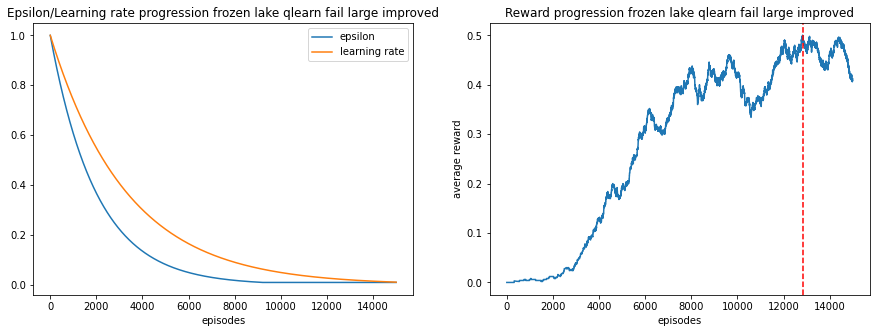

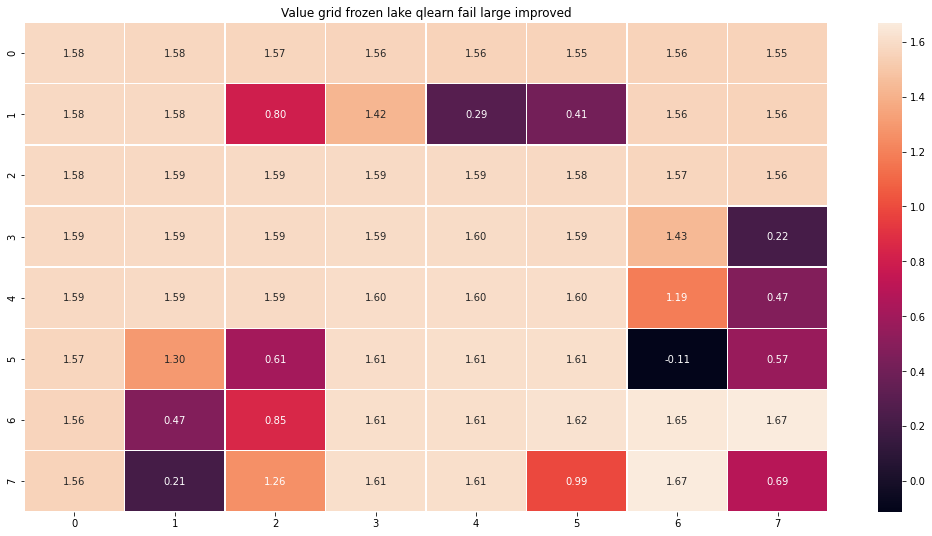

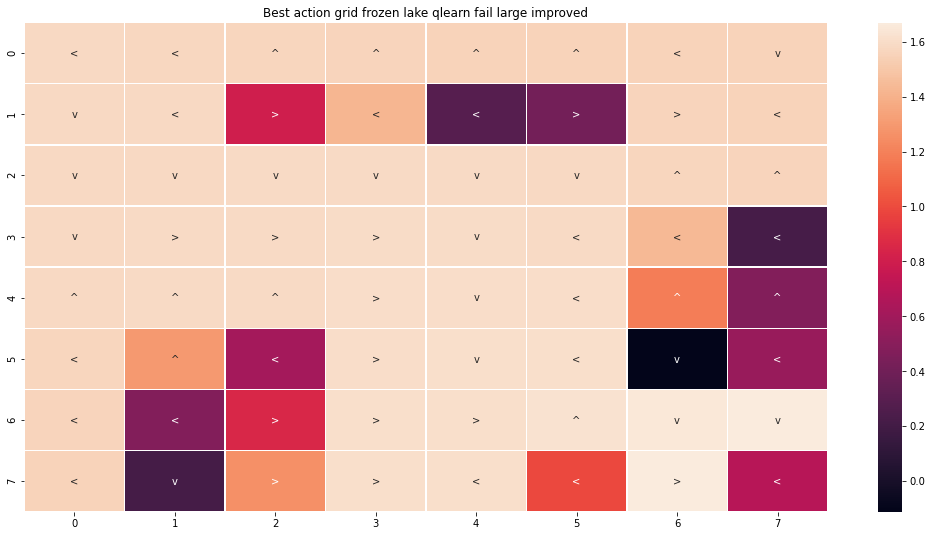

Wall time: 25.9 s


In [13]:
%%time
initial_Q = np.random.uniform(-1, 1, (env_large.nS, env_large.nA))
_, policy_qlearning_large_improved, stats_ql_large_improved = q_learning_function(env_large, num_episodes=15000, discount_factor=0.9995, initial_Q=initial_Q,
                                                                                  learning_rate_decay=0.9997, epsilon_decay=0.9995, name=ENV_NAME+"_qlearn_fail_large_improved")


Episode 3000
average score = 0.1340

Episode 6000
average score = 0.4260

Episode 9000
average score = 0.6680

Episode 12000
average score = 0.6780

Episode 15000
average score = 0.7180

---> finished at episode 15000 in 13.30 seconds
max score: 0.744 at episode 11324 after 9.29s


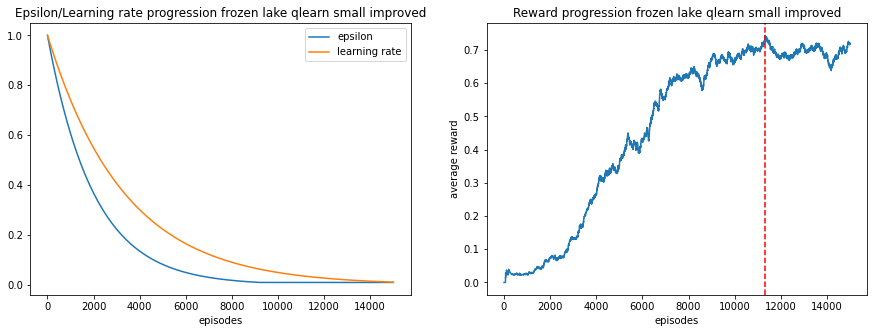

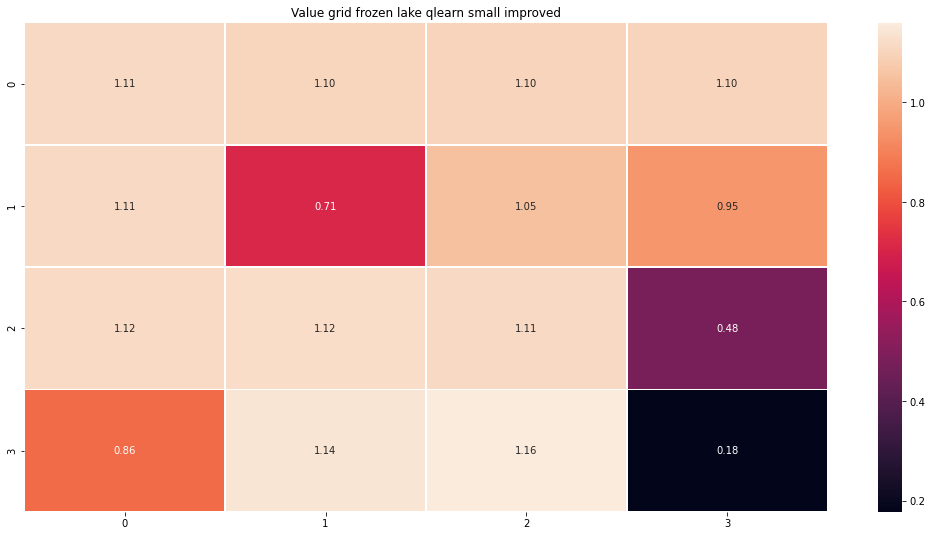

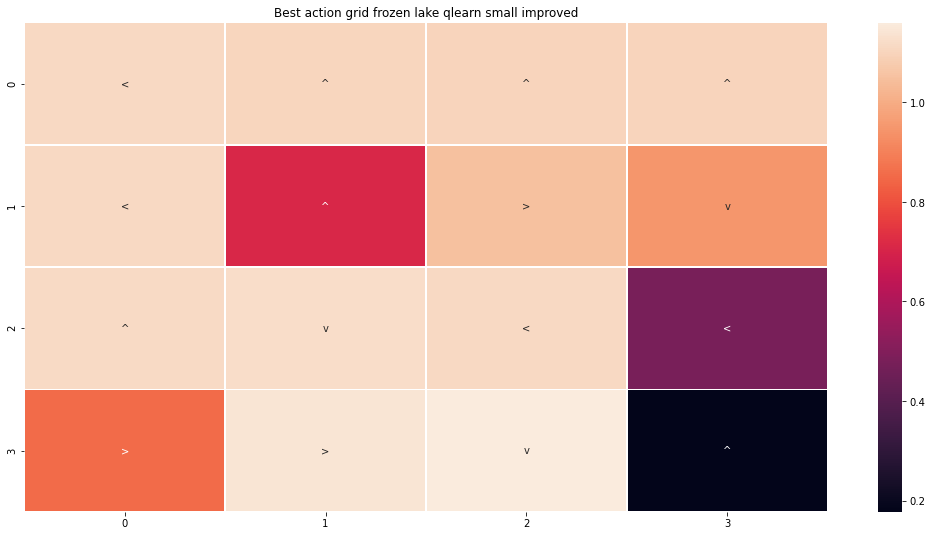

Wall time: 14.5 s


In [14]:
%%time
initial_Q = np.random.uniform(-1, 1, (env_small.nS, env_small.nA))
_, policy_qlearning_small_improved, stats_ql_small_improved = q_learning_function(env_small, num_episodes=15000, discount_factor=0.9995, initial_Q=initial_Q,
                                                                learning_rate_decay=0.9997, epsilon_decay=0.9995, name=ENV_NAME+"_qlearn_small_improved")

# Comparing the 3 algorithms

In [15]:
%%time
stats_final_vi_small = play_function(env_small, policy_vi_small)

Wall time: 6.21 s


In [16]:
%%time
stats_final_vi_large = play_function(env_large, policy_vi_large)

Wall time: 13.1 s


In [17]:
%%time
stats_final_pi_small = play_function(env_small, policy_pi_small)

Wall time: 6.56 s


In [18]:
%%time
stats_final_pi_large = play_function(env_large, policy_pi_large)

Wall time: 12.7 s


In [19]:
%%time
stats_final_ql_small = play_function(env_small, policy_qlearning_small)

Wall time: 7.51 s


In [26]:
%%time
stats_final_ql_large = play_function(env_large, policy_qlearning_large)

Wall time: 11.9 s


### Improved QL

In [21]:
%%time
stats_final_ql_small_improved = play_function(env_small, policy_qlearning_small_improved)

Wall time: 6.85 s


In [22]:
%%time
stats_final_ql_large_improved = play_function(env_large, policy_qlearning_large_improved)

Wall time: 12.9 s


## Regroup stats for analysis

In [27]:
columns = ["VI_small", "VI_large", "PI_small", "PI_large", "QL_small", "QL_small_improved", "QL_large", "QL_large_improved"]
rows_name = ["Iteration/episode convergence", "Running time (s)", "Success rate average", "Success rate std"]
dict_to_df = {"Stats name": rows_name}

for key in columns:
    stats1 = eval(f"stats_{key.lower()}")
    stats2 = eval(f"stats_final_{key.lower()}")
    list_stats = [stats1['max_iteration'], stats1['running_time'], stats2['mean_score'], stats2['std_score']]
    dict_to_df[key] = list_stats    

df = pd.DataFrame.from_dict(dict_to_df).round(decimals=2)

In [28]:
df

,Stats name,VI_small,VI_large,PI_small,PI_large,QL_small,QL_small_improved,QL_large,QL_large_improved
0,Iteration/episode convergence,182.00,199.00,221.00,397.00,14702.00,11324.00,97592.00,12825.00
1,Running time (s),0.11,0.39,0.16,0.78,13.67,9.29,141.97,20.09
2,Success rate average,74.32,49.13,73.77,49.28,74.25,74.84,46.54,47.19
3,Success rate std,5.08,5.11,3.88,4.87,4.46,4.15,4.84,4.25
